In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Supervised Learning/csv files/Advertising.csv')

In [4]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
X = df.drop('sales',axis = 1)
Y = df['sales']

#Polynomial Regression

In [6]:
from sklearn.preprocessing import PolynomialFeatures

In [7]:
polynomial_converter = PolynomialFeatures(degree=2,include_bias=False) #bias is intercept ?? will add one more column look into notes

In [8]:
# polynomial_converter.fit(X)

In [9]:
# polynomial_converter.transform(X)

In [10]:
poly_features = polynomial_converter.fit_transform(X) #short hand to do both steps in one go

In [11]:
X.shape #orignal features

(200, 3)

In [12]:
poly_features.shape #new features along with orignals

(200, 9)

In [13]:
X.iloc[0]

,0
TV,230.1
radio,37.8
newspaper,69.2


In [14]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [15]:
poly_features[0][:3] #first three are the same as orignal features

array([230.1,  37.8,  69.2])

In [16]:
poly_features[0][3:6]

array([52946.01,  8697.78, 15922.92])

In [17]:
poly_features[0][:3] **2 #next three are the square of the first three bcz we selected degree = 2 earlier

array([52946.01,  1428.84,  4788.64])

In [18]:
#finally last three are the combinations of the first three
#TV * radio
230.1 * 37.8

8697.779999999999

In [19]:
#radio * newspaper
37.8 * 69.2

2615.7599999999998

In [20]:
# TV * newspaper
230.1 *  69.2

15922.92

In [21]:
poly_features[0][6:9]

array([1428.84, 2615.76, 4788.64])

##Train, Test | split

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train , X_test , Y_train , Y_test = train_test_split(poly_features,Y,test_size=0.3,random_state=101)

#Model for fitting on Polynominal Data

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
#X_train and Y_train has 9 features cz these are made from the polymial version of our data from earlier so to check our model we will have to create polynomial of our new data before using it into model
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

##Evaluation on Test set

In [26]:
test_predictions = model.predict(X_test)

In [27]:
from sklearn.metrics import mean_absolute_error , mean_squared_error

In [28]:
MAE = mean_absolute_error(Y_test,test_predictions)
MSE = mean_squared_error(Y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [29]:
MAE

0.4896798044803838

In [30]:
MSE

0.4417505510403753

In [31]:
RMSE

np.float64(0.6646431757269274)

In [32]:
df['sales'].mean()

np.float64(14.0225)

In [33]:
#comparing this from the linear regression we can see that our error has decreased significantly in this dataset so the performace of our model will be better even if a lil

#Choosing a Model

###Adjusting parameters

In [35]:
from math import degrees
#TRAINING ERROR PER DEGREE
train_rmse_er = []
#TEST ERROR PER DEGREE
test_rmse_er = []

for d in range(1,10):
  #CREATE POLY DATASET FOR DEGREE 'd'
  poly_conv = PolynomialFeatures(degree=d,include_bias=False)
  poly_feat = poly_conv.fit_transform(X)

  #SPLIT INTO TRAINING AND TEST SET
  X_train, X_test , Y_train,Y_test = train_test_split(poly_feat , Y , test_size= 0.3 , random_state=101)

  #TRAIN ON THIS NEW POLY SET FOR d DEGREE POLYNOMIAL
  model = LinearRegression()
  model.fit(X_train,Y_train)

  #PREDICTION ON BOTH TRAIN AND TEST SET
  train_pred = model.predict(X_train)
  test_pred = model.predict(X_test)

  #Erros on train set
  train_RMSE = np.sqrt(mean_squared_error(Y_train,train_pred))
  test_RMSE = np.sqrt(mean_squared_error(Y_test,test_pred))

  #Append errors to the lists
  train_rmse_er.append(train_RMSE)
  test_rmse_er.append(test_RMSE)


In [36]:
train_rmse_er

[np.float64(1.734594124329376),
 np.float64(0.5879574085292232),
 np.float64(0.43393443569020673),
 np.float64(0.35170836883993495),
 np.float64(0.25093430399765837),
 np.float64(0.20953728599482707),
 np.float64(0.22046859152326304),
 np.float64(0.27149790271647406),
 np.float64(0.5132042855932262)]

In [37]:
test_rmse_er

[np.float64(1.5161519375993877),
 np.float64(0.6646431757269274),
 np.float64(0.5803286825236476),
 np.float64(0.5077742639859423),
 np.float64(2.575825081302852),
 np.float64(9.871410116034689),
 np.float64(41.330566088617964),
 np.float64(3103.1690816455084),
 np.float64(12768.354850329179)]

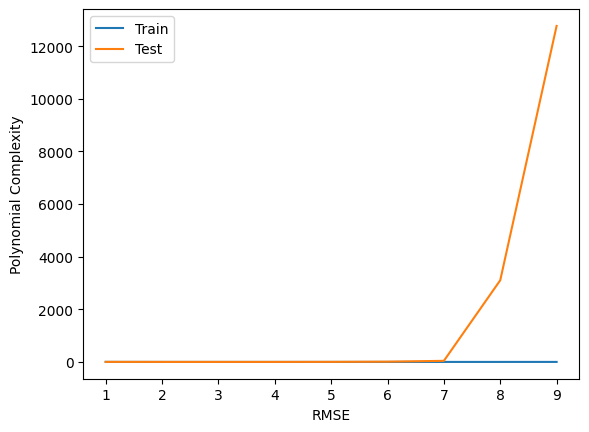

In [42]:
plt.plot(range(1,10),train_rmse_er,label='Train')
plt.plot(range(1,10),test_rmse_er,label = 'Test')
plt.ylabel('Polynomial Complexity')
plt.xlabel('RMSE')
plt.legend()
plt.show()

####As we can see that our train plotis straght forward a line but test error is going overwhelmingly high so that means our model is overfitting

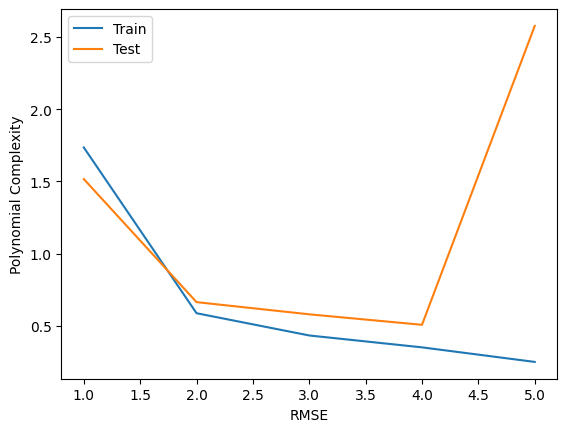

In [41]:
#we can try different random states or different parts of the data to figure out how much degree of data is likely to be enough for training by observation
#like in this we selected the first five degrees and we can see that starting from 4th degree the error is going extremely high so we may choose the degree 3 for our final model
plt.plot(range(1,6),train_rmse_er[:5],label='Train')
plt.plot(range(1,6),test_rmse_er[:5],label = 'Test')
plt.ylabel('Polynomial Complexity')
plt.xlabel('RMSE')
plt.legend()
plt.show()

#Creating final model

In [43]:
final_polyconv = PolynomialFeatures(degree= 3,include_bias=False)


In [44]:
final_model = LinearRegression()

In [45]:
final_model.fit(final_polyconv.fit_transform(X),Y) #training the final model on whole data

LinearRegression()

###Our model is trained to work if polynomial features so we will have to save our poly converter as well to convert our normal data into polynomial sets

In [50]:
#saved the model
from joblib import dump ,load
# dump(final_model,'/content/drive/MyDrive/Colab Notebooks/Supervised Learning/PolyModel.joblib')
# dump(final_polyconv,'/content/drive/MyDrive/Colab Notebooks/Supervised Learning/PolyConverter.joblib')

['/content/drive/MyDrive/Colab Notebooks/Supervised Learning/PolyConverter.joblib']

#Prediction

In [51]:
loaded_model = load('/content/drive/MyDrive/Colab Notebooks/Supervised Learning/PolyModel.joblib')
loaded_poly = load('/content/drive/MyDrive/Colab Notebooks/Supervised Learning/PolyConverter.joblib')

In [53]:
#let's say our normal data is this
campaign = [[123,34,23],[121,99,34]]

#first use poly converted to convert our data to polynomial data so that model can work on it
poly_campaign = loaded_poly.transform(campaign)

#now simply predict using this transformed poly
loaded_model.predict(poly_campaign)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([15.77187542, 28.384529  ])

###We can comapare this from the results we got in the linear regression model as can see the difference , with this data set our poly model is working better

#